In [25]:
import numpy as np
import pandas as pd

In [26]:
WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed']

def obscure_features(DF):
    '''
    We replace 'winner' and 'loser' with 'player_1' and 'player_2' (not necessarily in that order)
    'player_1' replaces the name of the player that comes first alphabetically
    The purpose of this is to predict the winner of a match without the data being tied to
    the known winner or loser.
    '''
    DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
    DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
    for ext in WL_extensions:
        p1_feature = np.where(DF['player_1'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        p2_feature = np.where(DF['player_2'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        DF['player_1_' + ext] = p1_feature
        DF['player_2_' + ext] = p2_feature
        
    winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
    loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
    cols_to_drop = winner_cols + loser_cols
    
    target = DF['winner_name']
    
    DF.drop(cols_to_drop, axis = 1, inplace = True)
    
    DF['winner'] = target
    
    return DF

In [27]:
# Combine data from years 2000-2019

df_list = [pd.read_csv('atp_matches_' + str(year) + '.csv') for year in range(2000,2020)]

In [28]:
matches = obscure_features(pd.concat(df_list, axis = 0))

In [29]:
matches.index = range(matches.shape[0])

In [30]:
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-301,Auckland,Hard,32,A,20000110,1,7-5 4-6 7-5,3,R32,...,GER,Jeff Tarango,Tommy Haas,63.0,11.0,595.0,1612.0,NaN,1.0,Tommy Haas
1,2000-301,Auckland,Hard,32,A,20000110,2,7-5 7-5,3,R32,...,ESP,Franco Squillari,Juan Balcells,49.0,211.0,723.0,157.0,NaN,NaN,Juan Balcells
2,2000-301,Auckland,Hard,32,A,20000110,3,6-3 6-1,3,R32,...,ESP,Alberto Berasategui,Alberto Martin,59.0,48.0,649.0,726.0,NaN,NaN,Alberto Martin
3,2000-301,Auckland,Hard,32,A,20000110,4,6-4 6-4,3,R32,...,SUI,Juan Carlos Ferrero,Roger Federer,45.0,61.0,768.0,616.0,7.0,NaN,Juan Carlos Ferrero
4,2000-301,Auckland,Hard,32,A,20000110,5,0-6 7-6(7) 6-1,3,R32,...,FRA,Michael Sell,Nicolas Escude,167.0,34.0,219.0,873.0,NaN,4.0,Michael Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61700,2019-7696,NextGen Finals,Hard,8,F,20191105,290,4-2 4-2 4-2,3,RR,...,SWE,Frances Tiafoe,Mikael Ymer,47.0,74.0,1050.0,765.0,2.0,6.0,Frances Tiafoe
61701,2019-7696,NextGen Finals,Hard,8,F,20191105,289,3-4(4) 4-2 4-2 4-2,3,RR,...,ITA,Frances Tiafoe,Jannik Sinner,47.0,95.0,1050.0,596.0,2.0,8.0,Jannik Sinner
61702,2019-7696,NextGen Finals,Hard,8,F,20191105,288,4-3(2) 1-4 4-2 4-1,3,RR,...,FRA,Mikael Ymer,Ugo Humbert,74.0,55.0,765.0,972.0,6.0,3.0,Mikael Ymer
61703,2019-7696,NextGen Finals,Hard,8,F,20191105,287,4-3(5) 3-4(3) 4-2 4-2,3,RR,...,FRA,Jannik Sinner,Ugo Humbert,95.0,55.0,596.0,972.0,8.0,3.0,Ugo Humbert


In [32]:
# Player rankings from 2000-2019

rankings_10s = pd.read_csv('atp_rankings_10s.csv', header = None)
rankings_10s.columns = ['week', 'ranking', 'player_id', 'ranking_points']

rankings_00s = pd.read_csv('atp_rankings_00s.csv', header = None)
rankings_00s.columns = ['week', 'ranking', 'player_id', 'ranking_points']

rankings = pd.concat([rankings_00s, rankings_10s])

rankings.index = range(rankings.shape[0])

rankings

C:\Users\blues\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,week,ranking,player_id,ranking_points
0,ranking_date,rank,player,points
1,20000110,1,101736,4135
2,20000110,2,102338,2915
3,20000110,3,101948,2419
4,20000110,4,103017,2184
...,...,...,...,...
1836522,20191230,1922,134833,1
1836523,20191230,1922,144856,1
1836524,20191230,1922,202326,1
1836525,20191230,1926,207307,1


In [33]:
from datetime import timedelta, date

In [35]:
matches['tourney_date'] = pd.to_datetime(matches.tourney_date, format = '%Y%m%d')
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-301,Auckland,Hard,32,A,2000-01-10,1,7-5 4-6 7-5,3,R32,...,GER,Jeff Tarango,Tommy Haas,63.0,11.0,595.0,1612.0,NaN,1.0,Tommy Haas
1,2000-301,Auckland,Hard,32,A,2000-01-10,2,7-5 7-5,3,R32,...,ESP,Franco Squillari,Juan Balcells,49.0,211.0,723.0,157.0,NaN,NaN,Juan Balcells
2,2000-301,Auckland,Hard,32,A,2000-01-10,3,6-3 6-1,3,R32,...,ESP,Alberto Berasategui,Alberto Martin,59.0,48.0,649.0,726.0,NaN,NaN,Alberto Martin
3,2000-301,Auckland,Hard,32,A,2000-01-10,4,6-4 6-4,3,R32,...,SUI,Juan Carlos Ferrero,Roger Federer,45.0,61.0,768.0,616.0,7.0,NaN,Juan Carlos Ferrero
4,2000-301,Auckland,Hard,32,A,2000-01-10,5,0-6 7-6(7) 6-1,3,R32,...,FRA,Michael Sell,Nicolas Escude,167.0,34.0,219.0,873.0,NaN,4.0,Michael Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61700,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,290,4-2 4-2 4-2,3,RR,...,SWE,Frances Tiafoe,Mikael Ymer,47.0,74.0,1050.0,765.0,2.0,6.0,Frances Tiafoe
61701,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,289,3-4(4) 4-2 4-2 4-2,3,RR,...,ITA,Frances Tiafoe,Jannik Sinner,47.0,95.0,1050.0,596.0,2.0,8.0,Jannik Sinner
61702,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,288,4-3(2) 1-4 4-2 4-1,3,RR,...,FRA,Mikael Ymer,Ugo Humbert,74.0,55.0,765.0,972.0,6.0,3.0,Mikael Ymer
61703,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,287,4-3(5) 3-4(3) 4-2 4-2,3,RR,...,FRA,Jannik Sinner,Ugo Humbert,95.0,55.0,596.0,972.0,8.0,3.0,Ugo Humbert


In [46]:
pd.set_option('max_columns', None)

In [47]:
rankings

,week,ranking,player_id,ranking_points
0,ranking_date,rank,player,points
1,20000110,1,101736,4135
2,20000110,2,102338,2915
3,20000110,3,101948,2419
4,20000110,4,103017,2184
...,...,...,...,...
1836522,20191230,1922,134833,1
1836523,20191230,1922,144856,1
1836524,20191230,1922,202326,1
1836525,20191230,1926,207307,1


In [112]:
rankings1=pd.read_csv('atp_rankings_00s.csv')
rankings2=pd.read_csv('atp_rankings_10s.csv')
rankings3=pd.read_csv('atp_rankings_20s.csv')
rankings12=pd.concat([rankings1, rankings2])
rankings=pd.concat([rankings12,rankings3])
rankings['ranking_date'] = pd.to_datetime(rankings['ranking_date'], format = '%Y%m%d')
rankings.head()

,ranking_date,rank,player,points
0,2000-01-10,1,101736,4135.0
1,2000-01-10,2,102338,2915.0
2,2000-01-10,3,101948,2419.0
3,2000-01-10,4,103017,2184.0
4,2000-01-10,5,102856,2169.0


In [53]:
rankings.head()

,ranking_date,rank,player,points
0,20000110,1,101736,4135.0
1,20000110,2,102338,2915.0
2,20000110,3,101948,2419.0
3,20000110,4,103017,2184.0
4,20000110,5,102856,2169.0


In [54]:
import re
score_mask = matches['score'].apply(lambda x: bool(re.findall('[a-zA-Z]', x)))
matches = matches[~score_mask]
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-301,Auckland,Hard,32,A,2000-01-10,1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,Jeff Tarango,Tommy Haas,31.137577,21.771389,NaN,NaN,L,R,180.0,188.0,101543,103163,USA,GER,Jeff Tarango,Tommy Haas,63.0,11.0,595.0,1612.0,NaN,1.0,Tommy Haas
1,2000-301,Auckland,Hard,32,A,2000-01-10,2,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,Franco Squillari,Juan Balcells,24.386037,24.558522,NaN,Q,L,R,183.0,190.0,102644,102607,ARG,ESP,Franco Squillari,Juan Balcells,49.0,211.0,723.0,157.0,NaN,NaN,Juan Balcells
2,2000-301,Auckland,Hard,32,A,2000-01-10,3,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,Alberto Berasategui,Alberto Martin,26.535250,21.390828,NaN,NaN,R,R,173.0,175.0,102238,103252,ESP,ESP,Alberto Berasategui,Alberto Martin,59.0,48.0,649.0,726.0,NaN,NaN,Alberto Martin
3,2000-301,Auckland,Hard,32,A,2000-01-10,4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,Juan Carlos Ferrero,Roger Federer,19.909651,18.422998,NaN,NaN,R,R,183.0,185.0,103507,103819,ESP,SUI,Juan Carlos Ferrero,Roger Federer,45.0,61.0,768.0,616.0,7.0,NaN,Juan Carlos Ferrero
4,2000-301,Auckland,Hard,32,A,2000-01-10,5,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,Michael Sell,Nicolas Escude,27.381246,23.770021,Q,NaN,R,R,180.0,185.0,102103,102765,USA,FRA,Michael Sell,Nicolas Escude,167.0,34.0,219.0,873.0,NaN,4.0,Michael Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61700,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,290,4-2 4-2 4-2,3,RR,66.0,2.0,0.0,52.0,37.0,27.0,9.0,9.0,4.0,4.0,6.0,0.0,46.0,34.0,23.0,7.0,9.0,3.0,6.0,Frances Tiafoe,Mikael Ymer,21.787817,21.152635,NaN,NaN,R,R,188.0,183.0,126207,144707,USA,SWE,Frances Tiafoe,Mikael Ymer,47.0,74.0,1050.0,765.0,2.0,6.0,Frances Tiafoe
61701,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,289,3-4(4) 4-2 4-2 4-2,3,RR,86.0,14.0,4.0,71.0,44.0,37.0,14.0,12.0,4.0,4.0,7.0,0.0,69.0,47.0,37.0,10.0,12.0,2.0,5.0,Frances Tiafoe,Jannik Sinner,21.787817,18.217659,NaN,NaN,R,R,188.0,188.0,126207,206173,USA,ITA,Frances Tiafoe,Jannik Sinner,47.0,95.0,1050.0,596.0,2.0,8.0,Jannik Sinner
61702,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,288,4-3(2) 1-4 4-2 4-1,3,RR,101.0,4.0,2.0,63.0,38.0,30.0,13.0,11.0,3.0,5.0,5.0,3.0,64.0,34.0,23.0,18.0,11.0,1.0,4.0,Mikael Ymer,Ugo Humbert,21.152635,21.357974,NaN,NaN,R,L,183.0,188.0,144707,200005,SWE,FRA,Mikael Ymer,Ugo Humbert,74.0,55.0,765.0,972.0,6.0,3.0,Mikael Ymer
61703,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,287,4-3(5) 3-4(3) 4-2 4-2,3,RR,103.0,11.0,3.0,77.0,46.0,34.0,19.0,12.0,3.0,4.0,4.0,0.0,75.0,46.0,36.0,16.0,12.0,1.0,4.0,Jannik Sinner,Ugo Humbert,18.217659,21.357974,NaN,NaN,R,L,188.0,188.0,206173,200005,ITA,FRA,Jannik Sinner,Ugo Humbert,95.0,55.0,596.0,972.0,8.0,3.0,Ugo Humbert


In [55]:
# remove parenthetical portion of score for tie-breakers

scores = matches['score'].copy()
matches['score'] = scores.apply(lambda score: re.sub('\(\d*\)', '', score))
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-301,Auckland,Hard,32,A,2000-01-10,1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,Jeff Tarango,Tommy Haas,31.137577,21.771389,NaN,NaN,L,R,180.0,188.0,101543,103163,USA,GER,Jeff Tarango,Tommy Haas,63.0,11.0,595.0,1612.0,NaN,1.0,Tommy Haas
1,2000-301,Auckland,Hard,32,A,2000-01-10,2,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,Franco Squillari,Juan Balcells,24.386037,24.558522,NaN,Q,L,R,183.0,190.0,102644,102607,ARG,ESP,Franco Squillari,Juan Balcells,49.0,211.0,723.0,157.0,NaN,NaN,Juan Balcells
2,2000-301,Auckland,Hard,32,A,2000-01-10,3,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,Alberto Berasategui,Alberto Martin,26.535250,21.390828,NaN,NaN,R,R,173.0,175.0,102238,103252,ESP,ESP,Alberto Berasategui,Alberto Martin,59.0,48.0,649.0,726.0,NaN,NaN,Alberto Martin
3,2000-301,Auckland,Hard,32,A,2000-01-10,4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,Juan Carlos Ferrero,Roger Federer,19.909651,18.422998,NaN,NaN,R,R,183.0,185.0,103507,103819,ESP,SUI,Juan Carlos Ferrero,Roger Federer,45.0,61.0,768.0,616.0,7.0,NaN,Juan Carlos Ferrero
4,2000-301,Auckland,Hard,32,A,2000-01-10,5,0-6 7-6 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,Michael Sell,Nicolas Escude,27.381246,23.770021,Q,NaN,R,R,180.0,185.0,102103,102765,USA,FRA,Michael Sell,Nicolas Escude,167.0,34.0,219.0,873.0,NaN,4.0,Michael Sell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61700,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,290,4-2 4-2 4-2,3,RR,66.0,2.0,0.0,52.0,37.0,27.0,9.0,9.0,4.0,4.0,6.0,0.0,46.0,34.0,23.0,7.0,9.0,3.0,6.0,Frances Tiafoe,Mikael Ymer,21.787817,21.152635,NaN,NaN,R,R,188.0,183.0,126207,144707,USA,SWE,Frances Tiafoe,Mikael Ymer,47.0,74.0,1050.0,765.0,2.0,6.0,Frances Tiafoe
61701,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,289,3-4 4-2 4-2 4-2,3,RR,86.0,14.0,4.0,71.0,44.0,37.0,14.0,12.0,4.0,4.0,7.0,0.0,69.0,47.0,37.0,10.0,12.0,2.0,5.0,Frances Tiafoe,Jannik Sinner,21.787817,18.217659,NaN,NaN,R,R,188.0,188.0,126207,206173,USA,ITA,Frances Tiafoe,Jannik Sinner,47.0,95.0,1050.0,596.0,2.0,8.0,Jannik Sinner
61702,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,288,4-3 1-4 4-2 4-1,3,RR,101.0,4.0,2.0,63.0,38.0,30.0,13.0,11.0,3.0,5.0,5.0,3.0,64.0,34.0,23.0,18.0,11.0,1.0,4.0,Mikael Ymer,Ugo Humbert,21.152635,21.357974,NaN,NaN,R,L,183.0,188.0,144707,200005,SWE,FRA,Mikael Ymer,Ugo Humbert,74.0,55.0,765.0,972.0,6.0,3.0,Mikael Ymer
61703,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,287,4-3 3-4 4-2 4-2,3,RR,103.0,11.0,3.0,77.0,46.0,34.0,19.0,12.0,3.0,4.0,4.0,0.0,75.0,46.0,36.0,16.0,12.0,1.0,4.0,Jannik Sinner,Ugo Humbert,18.217659,21.357974,NaN,NaN,R,L,188.0,188.0,206173,200005,ITA,FRA,Jannik Sinner,Ugo Humbert,95.0,55.0,596.0,972.0,8.0,3.0,Ugo Humbert


In [56]:
# Function indicating number of games played in match

def total_games(s):
    num_list = re.findall('\d+', s)
    num_list = [int(x) for x in num_list]
    return sum(num_list)

matches['total_games'] = matches['score'].apply(total_games)
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-301,Auckland,Hard,32,A,2000-01-10,1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,Jeff Tarango,Tommy Haas,31.137577,21.771389,NaN,NaN,L,R,180.0,188.0,101543,103163,USA,GER,Jeff Tarango,Tommy Haas,63.0,11.0,595.0,1612.0,NaN,1.0,Tommy Haas,34
1,2000-301,Auckland,Hard,32,A,2000-01-10,2,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,Franco Squillari,Juan Balcells,24.386037,24.558522,NaN,Q,L,R,183.0,190.0,102644,102607,ARG,ESP,Franco Squillari,Juan Balcells,49.0,211.0,723.0,157.0,NaN,NaN,Juan Balcells,24
2,2000-301,Auckland,Hard,32,A,2000-01-10,3,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,Alberto Berasategui,Alberto Martin,26.535250,21.390828,NaN,NaN,R,R,173.0,175.0,102238,103252,ESP,ESP,Alberto Berasategui,Alberto Martin,59.0,48.0,649.0,726.0,NaN,NaN,Alberto Martin,16
3,2000-301,Auckland,Hard,32,A,2000-01-10,4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,Juan Carlos Ferrero,Roger Federer,19.909651,18.422998,NaN,NaN,R,R,183.0,185.0,103507,103819,ESP,SUI,Juan Carlos Ferrero,Roger Federer,45.0,61.0,768.0,616.0,7.0,NaN,Juan Carlos Ferrero,20
4,2000-301,Auckland,Hard,32,A,2000-01-10,5,0-6 7-6 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,Michael Sell,Nicolas Escude,27.381246,23.770021,Q,NaN,R,R,180.0,185.0,102103,102765,USA,FRA,Michael Sell,Nicolas Escude,167.0,34.0,219.0,873.0,NaN,4.0,Michael Sell,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61700,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,290,4-2 4-2 4-2,3,RR,66.0,2.0,0.0,52.0,37.0,27.0,9.0,9.0,4.0,4.0,6.0,0.0,46.0,34.0,23.0,7.0,9.0,3.0,6.0,Frances Tiafoe,Mikael Ymer,21.787817,21.152635,NaN,NaN,R,R,188.0,183.0,126207,144707,USA,SWE,Frances Tiafoe,Mikael Ymer,47.0,74.0,1050.0,765.0,2.0,6.0,Frances Tiafoe,18
61701,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,289,3-4 4-2 4-2 4-2,3,RR,86.0,14.0,4.0,71.0,44.0,37.0,14.0,12.0,4.0,4.0,7.0,0.0,69.0,47.0,37.0,10.0,12.0,2.0,5.0,Frances Tiafoe,Jannik Sinner,21.787817,18.217659,NaN,NaN,R,R,188.0,188.0,126207,206173,USA,ITA,Frances Tiafoe,Jannik Sinner,47.0,95.0,1050.0,596.0,2.0,8.0,Jannik Sinner,25
61702,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,288,4-3 1-4 4-2 4-1,3,RR,101.0,4.0,2.0,63.0,38.0,30.0,13.0,11.0,3.0,5.0,5.0,3.0,64.0,34.0,23.0,18.0,11.0,1.0,4.0,Mikael Ymer,Ugo Humbert,21.152635,21.357974,NaN,NaN,R,L,183.0,188.0,144707,200005,SWE,FRA,Mikael Ymer,Ugo Humbert,74.0,55.0,765.0,972.0,6.0,3.0,Mikael Ymer,23
61703,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,287,4-3 3-4 4-2 4-2,3,RR,103.0,11.0,3.0,77.0,46.0,34.0,19.0,12.0,3.0,4.0,4.0,0.0,75.0,46.0,36.0,16.0,12.0,1.0,4.0,Jannik Sinner,Ugo Humbert,18.217659,21.357974,NaN,NaN,R,L,188.0,188.0,206173,200005,ITA,FRA,Jannik Sinner,Ugo Humbert,95.0,55.0,596.0,972.0,8.0,3.0,Ugo Humbert,26


In [57]:
matches.index = range(matches.shape[0])
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-301,Auckland,Hard,32,A,2000-01-10,1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,Jeff Tarango,Tommy Haas,31.137577,21.771389,NaN,NaN,L,R,180.0,188.0,101543,103163,USA,GER,Jeff Tarango,Tommy Haas,63.0,11.0,595.0,1612.0,NaN,1.0,Tommy Haas,34
1,2000-301,Auckland,Hard,32,A,2000-01-10,2,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,Franco Squillari,Juan Balcells,24.386037,24.558522,NaN,Q,L,R,183.0,190.0,102644,102607,ARG,ESP,Franco Squillari,Juan Balcells,49.0,211.0,723.0,157.0,NaN,NaN,Juan Balcells,24
2,2000-301,Auckland,Hard,32,A,2000-01-10,3,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,Alberto Berasategui,Alberto Martin,26.535250,21.390828,NaN,NaN,R,R,173.0,175.0,102238,103252,ESP,ESP,Alberto Berasategui,Alberto Martin,59.0,48.0,649.0,726.0,NaN,NaN,Alberto Martin,16
3,2000-301,Auckland,Hard,32,A,2000-01-10,4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,Juan Carlos Ferrero,Roger Federer,19.909651,18.422998,NaN,NaN,R,R,183.0,185.0,103507,103819,ESP,SUI,Juan Carlos Ferrero,Roger Federer,45.0,61.0,768.0,616.0,7.0,NaN,Juan Carlos Ferrero,20
4,2000-301,Auckland,Hard,32,A,2000-01-10,5,0-6 7-6 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,Michael Sell,Nicolas Escude,27.381246,23.770021,Q,NaN,R,R,180.0,185.0,102103,102765,USA,FRA,Michael Sell,Nicolas Escude,167.0,34.0,219.0,873.0,NaN,4.0,Michael Sell,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59474,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,290,4-2 4-2 4-2,3,RR,66.0,2.0,0.0,52.0,37.0,27.0,9.0,9.0,4.0,4.0,6.0,0.0,46.0,34.0,23.0,7.0,9.0,3.0,6.0,Frances Tiafoe,Mikael Ymer,21.787817,21.152635,NaN,NaN,R,R,188.0,183.0,126207,144707,USA,SWE,Frances Tiafoe,Mikael Ymer,47.0,74.0,1050.0,765.0,2.0,6.0,Frances Tiafoe,18
59475,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,289,3-4 4-2 4-2 4-2,3,RR,86.0,14.0,4.0,71.0,44.0,37.0,14.0,12.0,4.0,4.0,7.0,0.0,69.0,47.0,37.0,10.0,12.0,2.0,5.0,Frances Tiafoe,Jannik Sinner,21.787817,18.217659,NaN,NaN,R,R,188.0,188.0,126207,206173,USA,ITA,Frances Tiafoe,Jannik Sinner,47.0,95.0,1050.0,596.0,2.0,8.0,Jannik Sinner,25
59476,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,288,4-3 1-4 4-2 4-1,3,RR,101.0,4.0,2.0,63.0,38.0,30.0,13.0,11.0,3.0,5.0,5.0,3.0,64.0,34.0,23.0,18.0,11.0,1.0,4.0,Mikael Ymer,Ugo Humbert,21.152635,21.357974,NaN,NaN,R,L,183.0,188.0,144707,200005,SWE,FRA,Mikael Ymer,Ugo Humbert,74.0,55.0,765.0,972.0,6.0,3.0,Mikael Ymer,23
59477,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,287,4-3 3-4 4-2 4-2,3,RR,103.0,11.0,3.0,77.0,46.0,34.0,19.0,12.0,3.0,4.0,4.0,0.0,75.0,46.0,36.0,16.0,12.0,1.0,4.0,Jannik Sinner,Ugo Humbert,18.217659,21.357974,NaN,NaN,R,L,188.0,188.0,206173,200005,ITA,FRA,Jannik Sinner,Ugo Humbert,95.0,55.0,596.0,972.0,8.0,3.0,Ugo Humbert,26


In [58]:
# Arrange matches chronologically
# This will be important, as many added features are based on a player's previous performance

matches2 = matches.copy().sort_values(by = ['tourney_date', 'tourney_id', 'match_num'])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
571,2000-339,Adelaide,Hard,32,A,2000-01-03,1,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,Arnaud Clement,Thomas Enqvist,22.026010,25.790554,NaN,NaN,R,R,173.0,190.0,103096,102358,FRA,SWE,Arnaud Clement,Thomas Enqvist,56.0,4.0,805.0,2606.0,NaN,1.0,Thomas Enqvist,19
572,2000-339,Adelaide,Hard,32,A,2000-01-03,2,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,Jens Knippschild,Roger Federer,24.862423,18.384668,NaN,NaN,R,R,190.0,185.0,102533,103819,GER,SUI,Jens Knippschild,Roger Federer,91.0,64.0,525.0,749.0,NaN,NaN,Roger Federer,17
573,2000-339,Adelaide,Hard,32,A,2000-01-03,3,3-6 7-6 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,Jan Michael Gambill,Wayne Arthurs,22.565366,28.777550,NaN,NaN,R,L,190.0,190.0,102998,101885,USA,AUS,Jan Michael Gambill,Wayne Arthurs,58.0,105.0,803.0,449.0,NaN,NaN,Jan Michael Gambill,32
574,2000-339,Adelaide,Hard,32,A,2000-01-03,4,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,Andrew Ilie,Sebastien Grosjean,23.690623,21.579740,NaN,NaN,R,R,180.0,175.0,102776,103206,AUS,FRA,Andrew Ilie,Sebastien Grosjean,54.0,27.0,845.0,1298.0,NaN,7.0,Sebastien Grosjean,15
575,2000-339,Adelaide,Hard,32,A,2000-01-03,5,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,Magnus Norman,Scott Draper,23.575633,25.560575,NaN,WC,R,L,188.0,178.0,102796,102401,SWE,AUS,Magnus Norman,Scott Draper,15.0,154.0,1748.0,297.0,3.0,NaN,Magnus Norman,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2019-11-23,2,6-4 6-0,3,RR,85.0,9.0,0.0,46.0,29.0,24.0,11.0,8.0,0.0,0.0,4.0,2.0,59.0,43.0,24.0,5.0,8.0,5.0,9.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,Rafael Nadal,16
59340,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,1,6-4 6-4,3,RR,85.0,3.0,3.0,67.0,44.0,37.0,9.0,10.0,5.0,6.0,16.0,3.0,65.0,44.0,29.0,7.0,10.0,4.0,7.0,Andrey Rublev,Vasek Pospisil,22.078029,29.404517,NaN,NaN,R,R,188.0,193.0,126094,105577,RUS,CAN,Andrey Rublev,Vasek Pospisil,23.0,150.0,1584.0,360.0,NaN,NaN,Andrey Rublev,20
59341,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,2,6-4 4-6 6-4,3,RR,110.0,11.0,6.0,93.0,58.0,46.0,14.0,15.0,5.0,7.0,5.0,2.0,85.0,59.0,42.0,14.0,15.0,2.0,5.0,Denis Shapovalov,Karen Khachanov,20.594114,23.493498,NaN,NaN,L,R,185.0,198.0,133430,111575,CAN,RUS,Denis Shapovalov,Karen Khachanov,15.0,17.0,2050.0,1840.0,NaN,NaN,Denis Shapovalov,30
59334,2019-M-DC-2019-FLS-M-CAN-ESP-01,Davis Cup Finals F: CAN vs ESP,Hard,4,D,2019-11-24,1,7-6 6-3,3,RR,109.0,1.0,1.0,68.0,49.0,38.0,14.0,11.0,3.0,4.0,4.0,6.0,68.0,36.0,28.0,15.0,10.0,3.0,5.0,Felix Auger Aliassime,Roberto Bautista Agut,19.277207,31.594798,NaN,NaN,R,R,193.0,183.0,200000,105138,CAN,ESP,Felix Auger Aliassime,Roberto Bautista Agut,21.0,9.0,1636.0,2540.0,NaN,NaN,Roberto Bautista Agut,22


In [59]:
matches2.index = range(matches2.shape[0])

In [60]:
# want to add columns containing head-to-heads between players from previous matches.

# first add column with both players' names

matches2['players'] = list(zip(matches2['player_1_name'], matches2['player_2_name']))
matches2

g = matches2.groupby('players')
df_list = []

#group by (player_1_name, player_2_name) and keep running total of wins by each player

for group, df in g:
    df = df[['winner']]
    
    n = df.shape[0]
    
    player_1_h2h = np.zeros(n)
    player_2_h2h = np.zeros(n)
    
    p1 = group[0]
    p2 = group[1]

    for i in range(1,n):
        if df.iloc[i-1,0] == p1:
            player_1_h2h[i] = player_1_h2h[i-1] + 1
            player_2_h2h[i] = player_2_h2h[i-1]
        else:
            player_1_h2h[i] = player_1_h2h[i-1]
            player_2_h2h[i] = player_2_h2h[i-1] + 1
            
    df['player_1_h2h'] = player_1_h2h
    df['player_2_h2h'] = player_2_h2h
    
    df_list.append(df)

<ipython-input-60-9b62f9672b42>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_1_h2h'] = player_1_h2h
<ipython-input-60-9b62f9672b42>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_2_h2h'] = player_2_h2h


In [61]:
# combine the above into single data frame

df_h2h = pd.concat(df_list, axis = 0)
df_h2h

,winner,player_1_h2h,player_2_h2h
28980,Adam Thompson,0.0,0.0
33015,Abd Hazli Bin Zainuddin,0.0,0.0
33013,Michael Leong,0.0,0.0
19486,Suwandi Suwandi,0.0,0.0
23237,Benjamin Balleret,0.0,0.0
...,...,...,...
57045,Yoshihito Nishioka,0.0,0.0
56516,Yibing Wu,0.0,0.0
57043,Zhe Li,0.0,0.0
15382,Yu Jr Wang,0.0,0.0


In [62]:
df_h2h = df_h2h.drop('winner', axis = 1)
df_h2h

,player_1_h2h,player_2_h2h
28980,0.0,0.0
33015,0.0,0.0
33013,0.0,0.0
19486,0.0,0.0
23237,0.0,0.0
...,...,...
57045,0.0,0.0
56516,0.0,0.0
57043,0.0,0.0
15382,0.0,0.0


In [63]:
#merge with matches2 data frame

matches2 = pd.merge(matches2, df_h2h, left_index = True, right_index = True)
matches2 = matches2.drop('players', axis = 1)
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h
0,2000-339,Adelaide,Hard,32,A,2000-01-03,1,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,Arnaud Clement,Thomas Enqvist,22.026010,25.790554,NaN,NaN,R,R,173.0,190.0,103096,102358,FRA,SWE,Arnaud Clement,Thomas Enqvist,56.0,4.0,805.0,2606.0,NaN,1.0,Thomas Enqvist,19,0.0,0.0
1,2000-339,Adelaide,Hard,32,A,2000-01-03,2,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,Jens Knippschild,Roger Federer,24.862423,18.384668,NaN,NaN,R,R,190.0,185.0,102533,103819,GER,SUI,Jens Knippschild,Roger Federer,91.0,64.0,525.0,749.0,NaN,NaN,Roger Federer,17,0.0,0.0
2,2000-339,Adelaide,Hard,32,A,2000-01-03,3,3-6 7-6 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,Jan Michael Gambill,Wayne Arthurs,22.565366,28.777550,NaN,NaN,R,L,190.0,190.0,102998,101885,USA,AUS,Jan Michael Gambill,Wayne Arthurs,58.0,105.0,803.0,449.0,NaN,NaN,Jan Michael Gambill,32,0.0,0.0
3,2000-339,Adelaide,Hard,32,A,2000-01-03,4,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,Andrew Ilie,Sebastien Grosjean,23.690623,21.579740,NaN,NaN,R,R,180.0,175.0,102776,103206,AUS,FRA,Andrew Ilie,Sebastien Grosjean,54.0,27.0,845.0,1298.0,NaN,7.0,Sebastien Grosjean,15,0.0,0.0
4,2000-339,Adelaide,Hard,32,A,2000-01-03,5,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,Magnus Norman,Scott Draper,23.575633,25.560575,NaN,WC,R,L,188.0,178.0,102796,102401,SWE,AUS,Magnus Norman,Scott Draper,15.0,154.0,1748.0,297.0,3.0,NaN,Magnus Norman,20,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59474,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2019-11-23,2,6-4 6-0,3,RR,85.0,9.0,0.0,46.0,29.0,24.0,11.0,8.0,0.0,0.0,4.0,2.0,59.0,43.0,24.0,5.0,8.0,5.0,9.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,Rafael Nadal,16,0.0,1.0
59475,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,1,6-4 6-4,3,RR,85.0,3.0,3.0,67.0,44.0,37.0,9.0,10.0,5.0,6.0,16.0,3.0,65.0,44.0,29.0,7.0,10.0,4.0,7.0,Andrey Rublev,Vasek Pospisil,22.078029,29.404517,NaN,NaN,R,R,188.0,193.0,126094,105577,RUS,CAN,Andrey Rublev,Vasek Pospisil,23.0,150.0,1584.0,360.0,NaN,NaN,Andrey Rublev,20,0.0,1.0
59476,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,2,6-4 4-6 6-4,3,RR,110.0,11.0,6.0,93.0,58.0,46.0,14.0,15.0,5.0,7.0,5.0,2.0,85.0,59.0,42.0,14.0,15.0,2.0,5.0,Denis Shapovalov,Karen Khachanov,20.594114,23.493498,NaN,NaN,L,R,185.0,198.0,133430,111575,CAN,RUS,Denis Shapovalov,Karen Khachanov,15.0,17.0,2050.0,1840.0,NaN,NaN,Denis Shapovalov,30,0.0,0.0
59477,2019-M-DC-2019-FLS-M-CAN-ESP-01,Davis Cup Finals F: CAN vs ESP,Hard,4,D,2019-11-24,1,7-6 6-3,3,RR,109.0,1.0,1.0,68.0,49.0,38.0,14.0,11.0,3.0,4.0,4.0,6.0,68.0,36.0,28.0,15.0,10.0,3.0,5.0,Felix Auger Aliassime,Roberto Bautista Agut,19.277207,31.594798,NaN,NaN,R,R,193.0,183.0,200000,105138,CAN,ESP,Felix Auger Aliassime,Roberto Bautista Agut,21.0,9.0,1636.0,2540.0,NaN,NaN,Roberto Bautista Agut,22,0.0

In [69]:
# a column indicating whether the match was won by player 1 or player 2
# will serve as the target variable for machine learning models

matches2['target'] = np.where(matches2['winner'] == matches2['player_1_name'],
                              'player_1',
                              'player_2')
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target
0,2000-339,Adelaide,Hard,32,A,2000-01-03,1,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,Arnaud Clement,Thomas Enqvist,22.026010,25.790554,NaN,NaN,R,R,173.0,190.0,103096,102358,FRA,SWE,Arnaud Clement,Thomas Enqvist,56.0,4.0,805.0,2606.0,NaN,1.0,Thomas Enqvist,19,0.0,0.0,player_2
1,2000-339,Adelaide,Hard,32,A,2000-01-03,2,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,Jens Knippschild,Roger Federer,24.862423,18.384668,NaN,NaN,R,R,190.0,185.0,102533,103819,GER,SUI,Jens Knippschild,Roger Federer,91.0,64.0,525.0,749.0,NaN,NaN,Roger Federer,17,0.0,0.0,player_2
2,2000-339,Adelaide,Hard,32,A,2000-01-03,3,3-6 7-6 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,Jan Michael Gambill,Wayne Arthurs,22.565366,28.777550,NaN,NaN,R,L,190.0,190.0,102998,101885,USA,AUS,Jan Michael Gambill,Wayne Arthurs,58.0,105.0,803.0,449.0,NaN,NaN,Jan Michael Gambill,32,0.0,0.0,player_1
3,2000-339,Adelaide,Hard,32,A,2000-01-03,4,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,Andrew Ilie,Sebastien Grosjean,23.690623,21.579740,NaN,NaN,R,R,180.0,175.0,102776,103206,AUS,FRA,Andrew Ilie,Sebastien Grosjean,54.0,27.0,845.0,1298.0,NaN,7.0,Sebastien Grosjean,15,0.0,0.0,player_2
4,2000-339,Adelaide,Hard,32,A,2000-01-03,5,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,Magnus Norman,Scott Draper,23.575633,25.560575,NaN,WC,R,L,188.0,178.0,102796,102401,SWE,AUS,Magnus Norman,Scott Draper,15.0,154.0,1748.0,297.0,3.0,NaN,Magnus Norman,20,0.0,0.0,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59474,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2019-11-23,2,6-4 6-0,3,RR,85.0,9.0,0.0,46.0,29.0,24.0,11.0,8.0,0.0,0.0,4.0,2.0,59.0,43.0,24.0,5.0,8.0,5.0,9.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,Rafael Nadal,16,0.0,1.0,player_2
59475,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,1,6-4 6-4,3,RR,85.0,3.0,3.0,67.0,44.0,37.0,9.0,10.0,5.0,6.0,16.0,3.0,65.0,44.0,29.0,7.0,10.0,4.0,7.0,Andrey Rublev,Vasek Pospisil,22.078029,29.404517,NaN,NaN,R,R,188.0,193.0,126094,105577,RUS,CAN,Andrey Rublev,Vasek Pospisil,23.0,150.0,1584.0,360.0,NaN,NaN,Andrey Rublev,20,0.0,1.0,player_1
59476,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,2,6-4 4-6 6-4,3,RR,110.0,11.0,6.0,93.0,58.0,46.0,14.0,15.0,5.0,7.0,5.0,2.0,85.0,59.0,42.0,14.0,15.0,2.0,5.0,Denis Shapovalov,Karen Khachanov,20.594114,23.493498,NaN,NaN,L,R,185.0,198.0,133430,111575,CAN,RUS,Denis Shapovalov,Karen Khachanov,15.0,17.0,2050.0,1840.0,NaN,NaN,Denis Shapovalov,30,0.0,0.0,player_1
59477,2019-M-DC-2019-FLS-M-CAN-ESP-01,Davis Cup Finals F: CAN vs ESP,Hard,4,D,2019-11-24,1,7-6 6-3,3,RR,109.0,1.0,1.0,68.0,49.0,38.0,14.0,11.0,3.0,4.0,4.0,6.0,68.0,36.0,28.0,15.0,10.0,3.0,5.0,Felix Auger Aliassime,Roberto Bautista Agut,19.277207,31.594798,NaN,NaN,R,R,193.0,183.0,200000,105138,CAN,ESP,Felix Auger Aliassim

In [70]:
# a column indicating a player's overall win % prior to the match

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby('player')

df_list = []
for group, df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
all_players = pd.concat(df_list, axis = 0)

for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_matches',
                  'player_' + str(int(group)) + '_wins']
    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-70-8811e3cfb97b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-70-8811e3cfb97b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [71]:
def winpct(x, y):
    '''
    Find a player's win %
    x = number of matches
    y = number of wins
    if x = 0, return 0
    '''
    if x == 0:
        return 0
    else:
        return y/x

winpct_vec = np.vectorize(winpct, otypes=[np.float])
matches2['player_1_win_pct'] = winpct_vec(matches2['player_1_matches'], matches2['player_1_wins'])
matches2['player_2_win_pct'] = winpct_vec(matches2['player_2_matches'], matches2['player_2_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct
0,2000-339,Adelaide,Hard,32,A,2000-01-03,1,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,Arnaud Clement,Thomas Enqvist,22.026010,25.790554,NaN,NaN,R,R,173.0,190.0,103096,102358,FRA,SWE,Arnaud Clement,Thomas Enqvist,56.0,4.0,805.0,2606.0,NaN,1.0,Thomas Enqvist,19,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
1,2000-339,Adelaide,Hard,32,A,2000-01-03,2,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,Jens Knippschild,Roger Federer,24.862423,18.384668,NaN,NaN,R,R,190.0,185.0,102533,103819,GER,SUI,Jens Knippschild,Roger Federer,91.0,64.0,525.0,749.0,NaN,NaN,Roger Federer,17,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
2,2000-339,Adelaide,Hard,32,A,2000-01-03,3,3-6 7-6 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,Jan Michael Gambill,Wayne Arthurs,22.565366,28.777550,NaN,NaN,R,L,190.0,190.0,102998,101885,USA,AUS,Jan Michael Gambill,Wayne Arthurs,58.0,105.0,803.0,449.0,NaN,NaN,Jan Michael Gambill,32,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
3,2000-339,Adelaide,Hard,32,A,2000-01-03,4,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,Andrew Ilie,Sebastien Grosjean,23.690623,21.579740,NaN,NaN,R,R,180.0,175.0,102776,103206,AUS,FRA,Andrew Ilie,Sebastien Grosjean,54.0,27.0,845.0,1298.0,NaN,7.0,Sebastien Grosjean,15,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
4,2000-339,Adelaide,Hard,32,A,2000-01-03,5,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,Magnus Norman,Scott Draper,23.575633,25.560575,NaN,WC,R,L,188.0,178.0,102796,102401,SWE,AUS,Magnus Norman,Scott Draper,15.0,154.0,1748.0,297.0,3.0,NaN,Magnus Norman,20,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59474,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2019-11-23,2,6-4 6-0,3,RR,85.0,9.0,0.0,46.0,29.0,24.0,11.0,8.0,0.0,0.0,4.0,2.0,59.0,43.0,24.0,5.0,8.0,5.0,9.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,Rafael Nadal,16,0.0,1.0,player_2,121,53,1138,951,0.438017,0.835677
59475,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,1,6-4 6-4,3,RR,85.0,3.0,3.0,67.0,44.0,37.0,9.0,10.0,5.0,6.0,16.0,3.0,65.0,44.0,29.0,7.0,10.0,4.0,7.0,Andrey Rublev,Vasek Pospisil,22.078029,29.404517,NaN,NaN,R,R,188.0,193.0,126094,105577,RUS,CAN,Andrey Rublev,Vasek Pospisil,23.0,150.0,1584.0,360.0,NaN,NaN,Andrey Rublev,20,0.0,1.0,player_1,166,87,237,98,0.524096,0.413502
59476,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,2,6-4 4-6 6-4,3,RR,110.0,11.0,6.0,93.0,58.0,46.0,14.0,15.0,5.0,7.0,5.0,2.0,85.0,59.0,42.0,14.0,15.0,2.0,5.0,Denis Shapovalov,Karen Khachanov,20.594114,23.493498,NaN,NaN,L,R,185.0,198.0,133430,111575,CAN,RUS,Denis Shapovalov,Karen Khachanov,15.0,17.0,2050.0,1840.0,NaN,NaN,Denis Shapovalov,30,0.0,0.0,player_1,151,83

In [73]:
# a column indicating a player's recent form
# recent form is overall win % plus a "penalty" of log10(1-(overall win % ) + (last 6 months win %))

n = matches2.shape[0]

player_1_recent_form = np.zeros(n)
player_2_recent_form = np.zeros(n)

for i in range(n):
    p1 = matches2.loc[i, 'player_1_name']
    p2 = matches2.loc[i, 'player_2_name']
    
    current_date = matches2.loc[i, 'tourney_date']
    match_number = matches2.loc[i, 'match_num']
    
    mask1 = matches2['tourney_date'] < current_date
    mask2 = (matches2['tourney_date'] == current_date) & (matches2['match_num'] < match_number)
    mask3 = matches2['tourney_date'] >= current_date - timedelta(180)
    
    recent_matches = matches2[(mask1 | mask2) & mask3]
    
    mask4 = (recent_matches['player_1_name'] == p1) | (recent_matches['player_2_name'] == p1)
    mask5 = (recent_matches['winner'] == p1)
    
    p1_matches = recent_matches[mask4].shape[0]
    p1_wins = recent_matches[mask5].shape[0]
    
    if p1_wins >= 10:
        player_1_recent_form[i] = (matches2.loc[i, 'player_1_win_pct']
                                   + np.log10(1 - matches2.loc[1, 'player_1_win_pct']
                                              + winpct(p1_matches, p1_wins)))
    else:
        player_1_recent_form[i] = matches2.loc[i, 'player_1_win_pct']
    
    mask6 = (recent_matches['player_1_name'] == p2) | (recent_matches['player_2_name'] == p2)
    mask7 = (recent_matches['winner'] == p2)
    
    p2_matches = recent_matches[mask6].shape[0]
    p2_wins = recent_matches[mask7].shape[0]
    
    if p2_wins >= 10:
        player_2_recent_form[i] = (matches2.loc[i, 'player_2_win_pct']
                                   + np.log10(1 - matches2.loc[1, 'player_2_win_pct']
                                              + winpct(p2_matches, p2_wins)))
    else:
        player_2_recent_form[i] = matches2.loc[i, 'player_2_win_pct']

In [74]:
matches2['player_1_recent_form'] = player_1_recent_form
matches2['player_2_recent_form'] = player_2_recent_form
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form
0,2000-339,Adelaide,Hard,32,A,2000-01-03,1,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,Arnaud Clement,Thomas Enqvist,22.026010,25.790554,NaN,NaN,R,R,173.0,190.0,103096,102358,FRA,SWE,Arnaud Clement,Thomas Enqvist,56.0,4.0,805.0,2606.0,NaN,1.0,Thomas Enqvist,19,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,2000-339,Adelaide,Hard,32,A,2000-01-03,2,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,Jens Knippschild,Roger Federer,24.862423,18.384668,NaN,NaN,R,R,190.0,185.0,102533,103819,GER,SUI,Jens Knippschild,Roger Federer,91.0,64.0,525.0,749.0,NaN,NaN,Roger Federer,17,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2000-339,Adelaide,Hard,32,A,2000-01-03,3,3-6 7-6 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,Jan Michael Gambill,Wayne Arthurs,22.565366,28.777550,NaN,NaN,R,L,190.0,190.0,102998,101885,USA,AUS,Jan Michael Gambill,Wayne Arthurs,58.0,105.0,803.0,449.0,NaN,NaN,Jan Michael Gambill,32,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,2000-339,Adelaide,Hard,32,A,2000-01-03,4,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,Andrew Ilie,Sebastien Grosjean,23.690623,21.579740,NaN,NaN,R,R,180.0,175.0,102776,103206,AUS,FRA,Andrew Ilie,Sebastien Grosjean,54.0,27.0,845.0,1298.0,NaN,7.0,Sebastien Grosjean,15,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,2000-339,Adelaide,Hard,32,A,2000-01-03,5,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,Magnus Norman,Scott Draper,23.575633,25.560575,NaN,WC,R,L,188.0,178.0,102796,102401,SWE,AUS,Magnus Norman,Scott Draper,15.0,154.0,1748.0,297.0,3.0,NaN,Magnus Norman,20,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59474,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2019-11-23,2,6-4 6-0,3,RR,85.0,9.0,0.0,46.0,29.0,24.0,11.0,8.0,0.0,0.0,4.0,2.0,59.0,43.0,24.0,5.0,8.0,5.0,9.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,Rafael Nadal,16,0.0,1.0,player_2,121,53,1138,951,0.438017,0.835677,0.603642,1.122918
59475,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,1,6-4 6-4,3,RR,85.0,3.0,3.0,67.0,44.0,37.0,9.0,10.0,5.0,6.0,16.0,3.0,65.0,44.0,29.0,7.0,10.0,4.0,7.0,Andrey Rublev,Vasek Pospisil,22.078029,29.404517,NaN,NaN,R,R,188.0,193.0,126094,105577,RUS,CAN,Andrey Rublev,Vasek Pospisil,23.0,150.0,1584.0,360.0,NaN,NaN,Andrey Rublev,20,0.0,1.0,player_1,166,87,237,98,0.524096,0.413502,0.756411,0.413502
59476,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,2,6-4 4-6 6-4,3,RR,110.0,11.0,6.0,93.0,58.0,46.0,14.0,15.0,5.0,7.0,5.0,2.0,85.0,59.0,42.0,14.0,15.0,2.0,5.0,Denis Shapovalov,Karen Khachano

In [75]:
print('number of observations with \'surface\' missing:', matches2['surface'].isnull().sum())

# there are 124 matches with the feature 'surface' missing
# however, many of these matches are from the same tournament
# this makes it feasible to look up these tournaments and impute the exact values.
missing_surface = matches2[matches2['surface'].isnull()][['tourney_name', 'tourney_date']]
for i in missing_surface.index:
    print(str(i)+':', missing_surface.loc[i, 'tourney_name'], missing_surface.loc[i, 'tourney_date'])

number of observations with 'surface' missing: 0


In [77]:
matches2['surface'].isnull().sum() #all missing 'surface' values imputed

0

In [78]:
# player's win % on surface

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['surface', 'player'])

df_list = []
for (group, surface), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
all_players = pd.concat(df_list, axis = 0)

for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'surface', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_surface_matches',
                  'player_' + str(int(group)) + '_surface_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-78-58c05022c03e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-78-58c05022c03e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [79]:
matches2['player_1_surface_win_pct'] = winpct_vec(matches2['player_1_surface_matches'],
                                                  matches2['player_1_surface_wins'])
matches2['player_2_surface_win_pct'] = winpct_vec(matches2['player_2_surface_matches'],
                                                  matches2['player_2_surface_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form,player_1_surface_matches,player_1_surface_wins,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct
0,2000-339,Adelaide,Hard,32,A,2000-01-03,1,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,Arnaud Clement,Thomas Enqvist,22.026010,25.790554,NaN,NaN,R,R,173.0,190.0,103096,102358,FRA,SWE,Arnaud Clement,Thomas Enqvist,56.0,4.0,805.0,2606.0,NaN,1.0,Thomas Enqvist,19,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-339,Adelaide,Hard,32,A,2000-01-03,2,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,Jens Knippschild,Roger Federer,24.862423,18.384668,NaN,NaN,R,R,190.0,185.0,102533,103819,GER,SUI,Jens Knippschild,Roger Federer,91.0,64.0,525.0,749.0,NaN,NaN,Roger Federer,17,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-339,Adelaide,Hard,32,A,2000-01-03,3,3-6 7-6 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,Jan Michael Gambill,Wayne Arthurs,22.565366,28.777550,NaN,NaN,R,L,190.0,190.0,102998,101885,USA,AUS,Jan Michael Gambill,Wayne Arthurs,58.0,105.0,803.0,449.0,NaN,NaN,Jan Michael Gambill,32,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-339,Adelaide,Hard,32,A,2000-01-03,4,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,Andrew Ilie,Sebastien Grosjean,23.690623,21.579740,NaN,NaN,R,R,180.0,175.0,102776,103206,AUS,FRA,Andrew Ilie,Sebastien Grosjean,54.0,27.0,845.0,1298.0,NaN,7.0,Sebastien Grosjean,15,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-339,Adelaide,Hard,32,A,2000-01-03,5,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,Magnus Norman,Scott Draper,23.575633,25.560575,NaN,WC,R,L,188.0,178.0,102796,102401,SWE,AUS,Magnus Norman,Scott Draper,15.0,154.0,1748.0,297.0,3.0,NaN,Magnus Norman,20,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59474,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2019-11-23,2,6-4 6-0,3,RR,85.0,9.0,0.0,46.0,29.0,24.0,11.0,8.0,0.0,0.0,4.0,2.0,59.0,43.0,24.0,5.0,8.0,5.0,9.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,Rafael Nadal,16,0.0,1.0,player_2,121,53,1138,951,0.438017,0.835677,0.603642,1.122918,82,38,573,450,0.463415,0.785340
59475,2019-M-DC-2019-FLS-M-RUS-CAN-01,Davis Cup Finals SF: RUS vs CAN,Hard,4,D,2019-11-23,1,6-4 6-4,3,RR,85.0,3.0,3.0,67.0,44.0,37.0,9.0,10.0,5.0,6.0,16.0,3.0,65.0,44.0,29.0,7.0,10.0,4.0,7.0,Andrey Rublev,Vasek Pospisil,22.078029,29.404517,NaN,NaN,R,R,188.0,193.0,126094,105577,RUS,CAN,Andrey Rublev,Vasek Pospisil,23.0,150.0,1584

In [80]:
matches2['tourney_level'].value_counts()


A    32551
M    11016
G     9718
D     5849
F      345
Name: tourney_level, dtype: int64

In [81]:
n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['tourney_level', 'player'])

df_list = []
for (group, tourney_level), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
    
all_players = pd.concat(df_list, axis = 0)


for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'tourney_level', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_level_matches',
                  'player_' + str(int(group)) + '_level_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-81-77ca468a59e1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-81-77ca468a59e1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [82]:
matches2['player_1_level_win_pct'] = winpct_vec(matches2['player_1_level_matches'],
                                                  matches2['player_1_level_wins'])
matches2['player_2_level_win_pct'] = winpct_vec(matches2['player_2_level_matches'],
                                                  matches2['player_2_level_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,player_1,player_2,player_1_age,player_2_age,player_1_entry,player_2_entry,player_1_hand,player_2_hand,player_1_ht,player_2_ht,player_1_id,player_2_id,player_1_ioc,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form,player_1_surface_matches,player_1_surface_wins,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_matches,player_1_level_wins,player_2_level_matches,player_2_level_wins,player_1_level_win_pct,player_2_level_win_pct
0,2000-339,Adelaide,Hard,32,A,2000-01-03,1,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,Arnaud Clement,Thomas Enqvist,22.026010,25.790554,NaN,NaN,R,R,173.0,190.0,103096,102358,FRA,SWE,Arnaud Clement,Thomas Enqvist,56.0,4.0,805.0,2606.0,NaN,1.0,Thomas Enqvist,19,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-339,Adelaide,Hard,32,A,2000-01-03,2,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,Jens Knippschild,Roger Federer,24.862423,18.384668,NaN,NaN,R,R,190.0,185.0,102533,103819,GER,SUI,Jens Knippschild,Roger Federer,91.0,64.0,525.0,749.0,NaN,NaN,Roger Federer,17,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-339,Adelaide,Hard,32,A,2000-01-03,3,3-6 7-6 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,Jan Michael Gambill,Wayne Arthurs,22.565366,28.777550,NaN,NaN,R,L,190.0,190.0,102998,101885,USA,AUS,Jan Michael Gambill,Wayne Arthurs,58.0,105.0,803.0,449.0,NaN,NaN,Jan Michael Gambill,32,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-339,Adelaide,Hard,32,A,2000-01-03,4,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,Andrew Ilie,Sebastien Grosjean,23.690623,21.579740,NaN,NaN,R,R,180.0,175.0,102776,103206,AUS,FRA,Andrew Ilie,Sebastien Grosjean,54.0,27.0,845.0,1298.0,NaN,7.0,Sebastien Grosjean,15,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-339,Adelaide,Hard,32,A,2000-01-03,5,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,Magnus Norman,Scott Draper,23.575633,25.560575,NaN,WC,R,L,188.0,178.0,102796,102401,SWE,AUS,Magnus Norman,Scott Draper,15.0,154.0,1748.0,297.0,3.0,NaN,Magnus Norman,20,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59474,2019-M-DC-2019-FLS-M-GBR-ESP-01,Davis Cup Finals SF: GBR vs ESP,Hard,4,D,2019-11-23,2,6-4 6-0,3,RR,85.0,9.0,0.0,46.0,29.0,24.0,11.0,8.0,0.0,0.0,4.0,2.0,59.0,43.0,24.0,5.0,8.0,5.0,9.0,Daniel Evans,Rafael Nadal,29.489391,33.459274,NaN,NaN,R,L,175.0,185.0,105554,104745,GBR,ESP,Daniel Evans,Rafael Nadal,42.0,1.0,1124.0,9985.0,NaN,NaN,Rafael Nadal,16,0.0,1.0,player_2,121,53,1138,951,0.438017,0.835677,0.603642,1.122918,82,38,573,450,0.463415,0.785340,24,7,28,27,0.291667,0.964286
59475,2019-M-DC

In [83]:
#there is an overabundance of the value 0 in many engineered features,
#which will lead to inaccuracy in predictions
#to resolve this, restrict to matches in which both players have played at least 100 matches
#thus, the following predictive models should only be used to predict winner between players who have played
#100 matches in their career at the 8 tournament levels considered in this project

mask = (matches2['player_1_matches'] >= 100) & (matches2['player_2_matches'] >= 100)
matches3 = matches2[mask].copy()


In [84]:
p1_missing_rank = matches3[matches3['player_1_rank'].isnull()][['player_1_name', 'player_1_id', 'tourney_name', 'tourney_date']]
p1_missing_rank

,player_1_name,player_1_id,tourney_name,tourney_date
13081,Tommy Haas,103163,San Jose,2004-02-09
17751,Andreas Vinciguerra,103714,Bastad,2005-07-04
23835,Nicolas Kiefer,103017,Halle,2007-06-11
24025,Nicolas Kiefer,103017,Wimbledon,2007-06-25
26116,Gustavo Kuerten,102856,Miami Masters,2008-03-27
28906,Andreas Vinciguerra,103714,Davis Cup WG R1: SWE vs ISR,2009-03-06
39455,Andreas Vinciguerra,103714,Davis Cup WG PO: BEL vs SWE,2012-09-14
42578,Joachim Johansson,104026,Stockholm,2013-10-14
46240,Mardy Fish,103888,Indian Wells Masters,2015-03-12
46451,Janko Tipsarevic,104386,Houston,2015-04-06


In [117]:
for i in p1_missing_rank.index:
    player_id = p1_missing_rank.loc[i, 'player_1_id']
    current_date = p1_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_1_id'] == player_id))
             & (~matches2['player_1_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
    matches3.loc[i, 'player_1_rank'] = round((current_date - last_match).days / 30)
    
for i in p2_missing_rank.index:
    player_id = p2_missing_rank.loc[i, 'player_2_id']
    current_date = p2_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_2_id'] == player_id))
             & (~matches2['player_2_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
 
    
    matches3.loc[i, 'player_2_rank'] =round((current_date - last_match).days / 30)

In [118]:
matches3.loc[p1_missing_rank.index][['player_1_name', 'player_1_rank']] #rankings imputed

,player_1_name,player_1_rank
13081,Tommy Haas,21.0
17751,Andreas Vinciguerra,21.0
23835,Nicolas Kiefer,13.0
24025,Nicolas Kiefer,13.0
26116,Gustavo Kuerten,12.0
28906,Andreas Vinciguerra,29.0
39455,Andreas Vinciguerra,14.0
42578,Joachim Johansson,32.0
46240,Mardy Fish,19.0
46451,Janko Tipsarevic,18.0


In [119]:
matches3.loc[p2_missing_rank.index][['player_2_name', 'player_2_rank']] #rankings imputed

,player_2_name,player_2_rank
12693,Thomas Johansson,14.0
12704,Thomas Johansson,14.0
12709,Thomas Johansson,14.0
23962,Nicolas Kiefer,13.0
24004,Nicolas Kiefer,13.0
25747,Guillermo Coria,19.0
37316,Paul Henri Mathieu,15.0
40869,Jean Rene Lisnard,20.0
42570,Joachim Johansson,32.0
46945,Tommy Haas,13.0


In [92]:

matches3.isnull().sum()[matches3.isnull().sum() > 0]

minutes                  1467
w_ace                     735
w_df                      735
w_svpt                    735
w_1stIn                   735
w_1stWon                  735
w_2ndWon                  735
w_SvGms                   735
w_bpSaved                 735
w_bpFaced                 735
l_ace                     735
l_df                      735
l_svpt                    735
l_1stIn                   735
l_1stWon                  735
l_2ndWon                  735
l_SvGms                   735
l_bpSaved                 735
l_bpFaced                 735
player_1_entry          20936
player_2_entry          20808
player_1_ht                 2
player_2_ht                 2
player_1_rank              13
player_2_rank              15
player_1_rank_points       13
player_2_rank_points       15
player_1_seed           12439
player_2_seed           11885
dtype: int64

In [120]:
matches3[matches3['player_1_hand'] == 'U']['player_1_name']

Series([], Name: player_1_name, dtype: object)

In [121]:
matches3[matches3['player_2_hand'] == 'U']['player_2_name']

Series([], Name: player_2_name, dtype: object)

In [122]:
matches3['player_1_hand'] = matches3['player_1_hand'].str.replace('U', 'R')
matches3['player_2_hand'] = matches3['player_2_hand'].str.replace('U', 'R')

In [123]:
matches3['h2h_diff'] = matches3['player_1_h2h'] - matches3['player_2_h2h']
matches3['recent_form_diff'] = matches3['player_1_recent_form'] - matches3['player_2_recent_form']
matches3['surface_diff'] = matches3['player_1_surface_win_pct'] - matches3['player_2_surface_win_pct']
matches3['level_diff'] = matches3['player_1_level_win_pct'] - matches3['player_2_level_win_pct']
matches3['log_player_1_rank'] = np.log(matches3['player_1_rank'])
matches3['log_player_2_rank'] = np.log(matches3['player_2_rank'])
matches3['log_rank_ratio'] = matches3['log_player_1_rank']-matches3['log_player_2_rank']
matches3['age_diff'] = matches3['player_1_age'] - matches3['player_2_age']

In [124]:
X = matches3[['player_1_age',
              'player_2_age',
              'log_player_1_rank',
              'log_player_2_rank',
              'player_1_h2h',
              'player_2_h2h',
              'player_1_recent_form',
              'player_2_recent_form',
              'player_1_surface_win_pct',
              'player_2_surface_win_pct',
              'player_1_level_win_pct',
              'player_2_level_win_pct',
              'surface',
              'tourney_level'
             ]]

y = matches3['target']

In [125]:

X

,player_1_age,player_2_age,log_player_1_rank,log_player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct,surface,tourney_level
4277,24.558522,20.101300,0.693147,1.945910,1.0,0.0,1.008753,1.012933,0.844444,0.666667,0.428571,0.818182,Clay,D
4793,20.235455,24.974675,1.791759,2.197225,1.0,2.0,1.003044,0.861480,0.680000,0.700000,0.822222,0.725806,Clay,A
4794,21.314168,22.978782,0.693147,2.302585,3.0,0.0,0.877836,0.874545,0.675000,0.612903,0.733333,0.634615,Clay,A
4797,20.235455,21.314168,1.791759,0.693147,0.0,1.0,0.996170,0.866638,0.666667,0.658537,0.808511,0.721311,Clay,A
4912,24.711841,27.271732,0.000000,1.945910,2.0,1.0,1.038241,0.889577,0.857143,0.486486,0.777778,0.769231,Clay,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59473,38.160164,24.859685,4.127134,4.234107,0.0,0.0,0.519380,0.669751,0.503906,0.523810,0.400000,0.444444,Hard,D
59474,29.489391,33.459274,3.737670,0.000000,0.0,1.0,0.603642,1.122918,0.463415,0.785340,0.291667,0.964286,Hard,D
59475,22.078029,29.404517,3.135494,5.010635,0.0,1.0,0.756411,0.413502,0.531250,0.460674,0.636364,0.500000,Hard,D
59476,20.594114,23.493498,2.708050,2.833213,0.0,0.0,0.753789,0.726421,0.591304,0.507463,0.750000,0.363636,Hard,D


In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [127]:
mask1 = (matches3['player_1_rank'] < matches3['player_2_rank']) & (matches3['target'] == 'player_1')
mask2 = (matches3['player_2_rank'] < matches3['player_1_rank']) & (matches3['target'] == 'player_2')

matches3[mask1 | mask2].shape[0] / matches3.shape[0]

0.6598261176574429

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)

In [130]:
lencoder = LabelEncoder()

def numer_label(DF):
    '''
    Assign numeric labels to values in non-numeric columns.
    '''
    categ_cols = ['surface', 'tourney_level']
    
    for name in categ_cols:
        DF[name] = lencoder.fit_transform(DF[name])
    return DF

X_train_ens = X_train.copy()
X_test_ens = X_test.copy()

X_train_ens = numer_label(X_train_ens)
X_test_ens = numer_label(X_test_ens)

In [131]:
gbc = GradientBoostingClassifier(max_features = 'sqrt')

gs_params = {'n_estimators': [400, 800, 1200],
             'max_depth': [2, 4, 6],
             'subsample': [.7, .8, .9]}

gs = GridSearchCV(gbc, gs_params, cv = 5)

gs.fit(X_train_ens, y_train)

gbc_best = gs.best_estimator_

print(gbc_best)
print(gbc_best.score(X_train_ens, y_train))
print(gbc_best.score(X_test_ens, y_test)) #improvement on baseline
                                          #possibly slight overfitting, but not terribly worrying

GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=400,
                           subsample=0.7)
0.7260440227285265
0.7001323918799647


In [132]:
# Want to examine the performance of the best model (gradient boosting classifier) more in-depth

# Specifically, want to study the case when the lower-ranked player is correctly chosen as the winner

gbc_predictions = gbc_best.predict(X_test_ens)

pred_rows = matches3.loc[y_test.index].copy()
pred_rows['prediction'] = gbc_predictions

pred_rows = pred_rows[['surface',
                       'tourney_level',
                       'target', 
                       'prediction',
                       'player_1_rank',
                       'player_2_rank',
                       'player_1_h2h',
                       'player_2_h2h',
                       'player_1_recent_form',
                       'player_2_recent_form',
                       'player_1_surface_win_pct',
                       'player_2_surface_win_pct',
                       'player_1_level_win_pct',
                       'player_2_level_win_pct']]

pred_rows['correct'] = pred_rows['target'] == pred_rows['prediction']

mask1 = (pred_rows['target'] == 'player_1') & (pred_rows['player_1_rank'] > pred_rows['player_2_rank'])
mask2 = (pred_rows['target'] == 'player_2') & (pred_rows['player_1_rank'] < pred_rows['player_2_rank'])
pred_rows['lower_ranked_won'] = mask1 | mask2
pred_rows

,surface,tourney_level,target,prediction,player_1_rank,player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct,correct,lower_ranked_won
41629,Grass,G,player_1,player_1,11.0,84.0,0.0,0.0,0.848508,0.442623,0.560000,0.312500,0.647059,0.407407,True,False
34019,Hard,A,player_2,player_2,40.0,11.0,6.0,1.0,0.751245,0.803284,0.518692,0.623762,0.579310,0.638484,True,False
27038,Grass,G,player_2,player_2,109.0,19.0,0.0,2.0,0.441718,0.816241,0.312500,0.571429,0.304348,0.647059,True,False
28505,Hard,G,player_1,player_1,9.0,60.0,3.0,1.0,0.998230,0.515075,0.779188,0.531381,0.765217,0.492958,True,False
16168,Carpet,A,player_2,player_1,24.0,30.0,0.0,0.0,0.794966,0.771606,0.638298,0.560000,0.601266,0.571429,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30941,Hard,M,player_2,player_1,7.0,11.0,0.0,1.0,0.919641,0.861255,0.704082,0.607955,0.588235,0.543210,False,True
49793,Grass,A,player_2,player_2,18.0,223.0,3.0,3.0,0.797578,0.945593,0.583333,0.720930,0.605505,0.780952,True,True
45316,Hard,A,player_2,player_1,83.0,31.0,0.0,0.0,0.406061,0.639070,0.450820,0.372093,0.432990,0.476636,False,False
38130,Clay,M,player_1,player_1,1.0,7.0,6.0,1.0,1.063090,0.876578,0.786885,0.623288,0.786885,0.606452,True,False


In [133]:
pred_rows.groupby('lower_ranked_won').agg({'correct': 'mean'}).reset_index()

# Prediction accuracy for matches where the higher ranked player won
# and where the lower ranked player won

,lower_ranked_won,correct
0,False,0.870946
1,True,0.388022


In [134]:
surfaces_accuracy = pred_rows.groupby(['surface', 'lower_ranked_won']).agg({'correct': 'mean'}).reset_index()
surfaces_accuracy

,surface,lower_ranked_won,correct
0,Carpet,False,0.833333
1,Carpet,True,0.480000
2,Clay,False,0.864269
3,Clay,True,0.395753
4,Grass,False,0.880137
5,Grass,True,0.426752
6,Hard,False,0.874195
7,Hard,True,0.371298


Text(6.799999999999997, 0.5, 'Prediction accuracy')

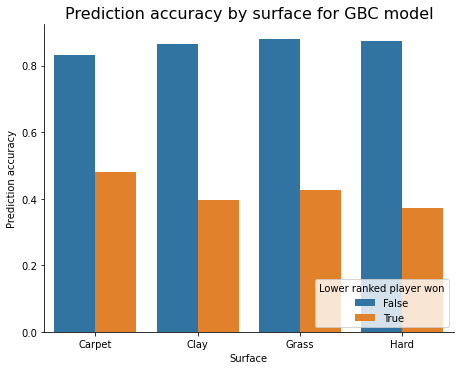

In [138]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(data = surfaces_accuracy,
            x = 'surface',
            y = 'correct',
            hue = 'lower_ranked_won',
            kind = 'bar',
            legend = False,
            height = 5,
            aspect = 1.3)

plt.title('Prediction accuracy by surface for GBC model', size = 16)
plt.legend(title = 'Lower ranked player won', loc = 'lower right')
plt.xlabel('Surface')
plt.ylabel('Prediction accuracy')

In [139]:
levels_accuracy = pred_rows.groupby(['tourney_level', 'lower_ranked_won']).agg({'correct': 'mean'}).reset_index()
levels_accuracy

,tourney_level,lower_ranked_won,correct
0,A,False,0.853569
1,A,True,0.394152
2,D,False,0.900990
3,D,True,0.479167
4,F,False,0.928571
5,F,True,0.250000
6,G,False,0.892977
7,G,True,0.420814
8,M,False,0.877817
9,M,True,0.356371


Text(26.124388888888895, 0.5, 'Prediction accuracy')

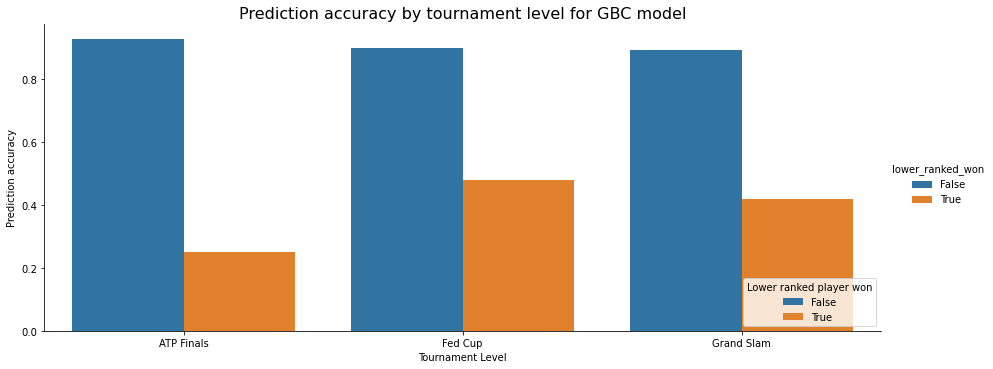

In [142]:
plot =  sns.catplot(data = levels_accuracy,
                    x = 'tourney_level',
                    y = 'correct',
                    hue = 'lower_ranked_won',
                    kind = 'bar',
                    order = ['F', 'D', 'G',],
                    height = 5,
                    aspect = 2.5)
plot.set_xticklabels(['ATP Finals', 'Fed Cup',
                      'Grand Slam'])

plt.title('Prediction accuracy by tournament level for GBC model', size = 16)
plt.legend(title = 'Lower ranked player won', loc = 'lower right')
plt.xlabel('Tournament Level')
plt.ylabel('Prediction accuracy')

In [144]:
# At C/O/D/F tournaments, correctly guess winner 74% of the time
# This is due to an increase in predictive accuracy for matches in which the higher-ranked player won
# What are reasons for this increase?

total = pred_rows[pred_rows['tourney_level'].isin(['C', 'O', 'D', 'F'])].shape[0]
correct = pred_rows[pred_rows['tourney_level'].isin(['C', 'O', 'D', 'F']) & (pred_rows['correct'] == True)].shape[0]
correct / total

0.7461139896373057

In [145]:
total = pred_rows[~pred_rows['tourney_level'].isin(['C', 'O', 'D', 'F'])].shape[0]
correct = pred_rows[(~pred_rows['tourney_level'].isin(['C', 'O', 'D', 'F'])) & (pred_rows['correct'] == True)].shape[0]
correct / total

0.6980871168471998

In [146]:
pred_rows['winner_level_diff'] = ((pred_rows['player_1_level_win_pct']
                                   - pred_rows['player_2_level_win_pct'])
                                  *(-1+2*(pred_rows['target']=='player_1')))

pred_rows['winner_surface_diff'] = ((pred_rows['player_1_surface_win_pct']
                                     - pred_rows['player_2_surface_win_pct'])
                                    *(-1+2*(pred_rows['target']=='player_1')))

pred_rows['winner_form_diff'] = ((pred_rows['player_1_recent_form']
                                  - pred_rows['player_2_recent_form'])
                                 *(-1+2*(pred_rows['target']=='player_1')))

C:\Users\blues\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


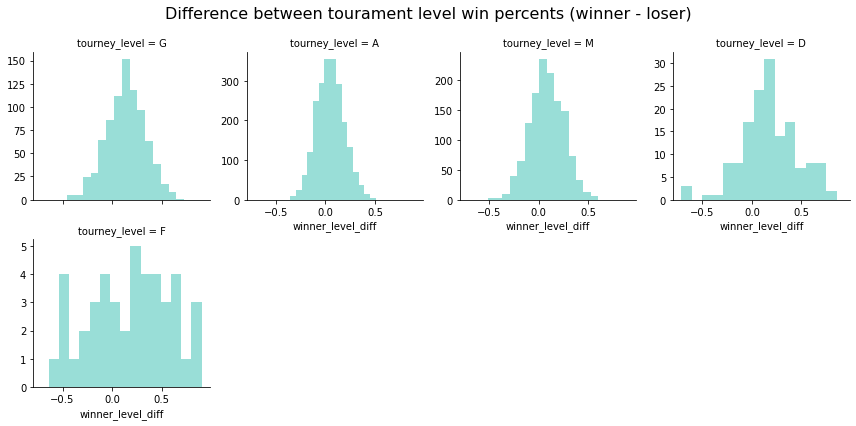

In [147]:
# What explains the increase in predictive accuracy for C, O, F, D for matches won by lower-ranked players?

# For these four tournament levels, the distributions are right-skewed, while the other tournaments are
# more symmetrical. Tournament level win % is a more effective predictor for these levels
grid = sns.FacetGrid(data = pred_rows, col = 'tourney_level', col_wrap = 4, sharey = False)
grid.map(sns.distplot, 'winner_level_diff', color = '#00AD9B', kde = False, bins = 15)

grid.fig.suptitle('Difference between tourament level win percents (winner - loser)', size = 16)
grid.fig.subplots_adjust(top=.875)

In [148]:
pred_rows.groupby('tourney_level')['winner_level_diff'].mean()

tourney_level
A    0.050529
D    0.182447
F    0.174042
G    0.138692
M    0.082390
Name: winner_level_diff, dtype: float64

In [149]:

pred_rows[pred_rows['tourney_level']=='G']['winner_level_diff']

41629    0.239651
27038    0.342711
28505    0.272260
55721   -0.020833
45034    0.252381
           ...   
30646    0.016698
47129   -0.113986
15242    0.214286
41403    0.304968
31360   -0.015152
Name: winner_level_diff, Length: 819, dtype: float64

In [157]:
# For F, there is little variation in ranking, so other features have more predictive power

from scipy.stats import iqr
D = pred_rows[pred_rows['tourney_level'] == 'D']['player_1_rank']
print('Fed Cup:', 'Standard deviation', D.std())

C = pred_rows[pred_rows['tourney_level'] == 'C']['player_1_rank']
print('Challenger:', 'Standard deviation', C.std())

F = pred_rows[pred_rows['tourney_level'] == 'F']['player_1_rank']
print('ATP Finals:', 'Standard deviation', F.std())

Fed Cup: Standard deviation 57.121815251412855
Challenger: Standard deviation nan
ATP Finals: Standard deviation 3.022117203055888


In [151]:
all_ranks = pd.concat([pred_rows['player_1_rank'], pred_rows['player_2_rank']])
cutoffs = np.insert(np.quantile(all_ranks, np.linspace(.1,1,10)), 0, 0)

In [152]:
pred_rows['player_1_bins'] = pd.cut(pred_rows['player_1_rank'],
                                    bins = cutoffs)

pred_rows['player_2_bins'] = pd.cut(pred_rows['player_2_rank'],
                                    bins = cutoffs)

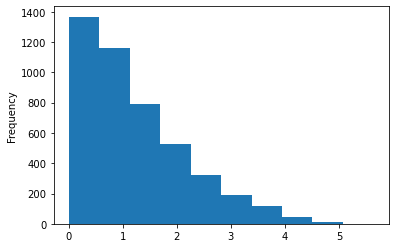

In [153]:
pred_rows['log_rank_ratio'] = np.abs(np.log(pred_rows['player_1_rank']/np.abs(pred_rows['player_2_rank'])))
pred_rows['log_rank_ratio'].plot.hist()

In [154]:
pred_rows.groupby('tourney_level')['log_rank_ratio'].mean()

tourney_level
A    1.109094
D    1.418891
F    1.010158
G    1.430477
M    1.290779
Name: log_rank_ratio, dtype: float64

In [155]:
pred_rows.groupby('tourney_level')['winner_level_diff'].mean()

tourney_level
A    0.050529
D    0.182447
F    0.174042
G    0.138692
M    0.082390
Name: winner_level_diff, dtype: float64

In [158]:
for surface in pred_rows['tourney_level'].unique():
    print(surface,
          ttest_1samp(pred_rows[pred_rows['tourney_level'] == surface]['winner_level_diff'],
                      popmean = 0)[1])

NameError: name 'ttest_1samp' is not defined

C:\Users\blues\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


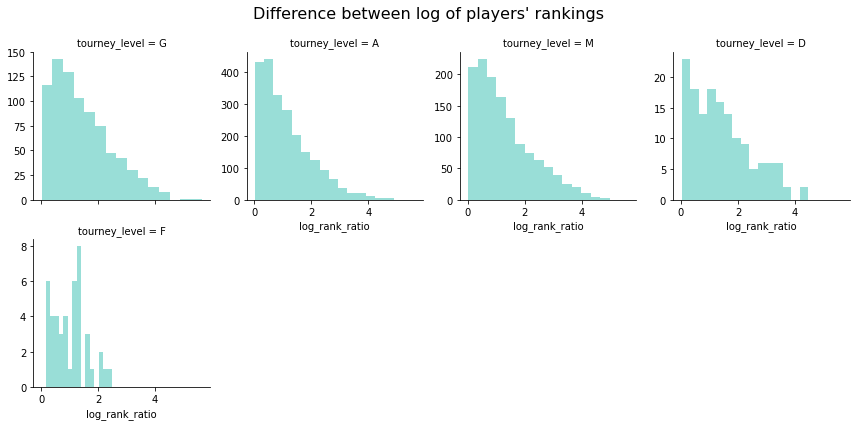

In [159]:
grid = sns.FacetGrid(data = pred_rows, col = 'tourney_level', col_wrap = 4, sharey = False)
grid.map(sns.distplot, 'log_rank_ratio', color = '#00AD9B', kde = False, bins = 15)

grid.fig.suptitle('Difference between log of players\' rankings', size = 16)
grid.fig.subplots_adjust(top=.875)

In [160]:
rank_diffs = matches3[['tourney_level', 'log_rank_ratio']].copy()
rank_diffs['log_rank_ratio'] = np.abs(rank_diffs['log_rank_ratio'])
rank_diffs.groupby('tourney_level').agg('mean')

# C and F tournaments have lowest variation in player rank

,log_rank_ratio
tourney_level,
A,1.109532
D,1.323171
F,0.925802
G,1.459959
M,1.293992


In [161]:
gps = pred_rows.groupby(['player_1_bins', 'player_2_bins'])

mean_by_bin = gps.agg({'lower_ranked_won': ['mean', 'size']}).reset_index()

mean_by_bin = mean_by_bin.dropna(how = 'any', axis = 0)
mean_by_bin = mean_by_bin.sort_values(by = ('lower_ranked_won', 'mean'),
                                      axis = 0,
                                      ascending = False)

mean_by_bin.head(20)

# Unsurprisingly, in matches where players' rankings are relatively close, the lower-ranked player
# has a higher chance of winning
# This scenario occurs most frequently in C and F.

player_1_bins   player_2_bins lower_ranked_won     
                                               mean size
65    (43.0, 54.0]    (34.0, 43.0]         0.630435   46
88    (68.0, 93.0]    (68.0, 93.0]         0.617021   47
89    (68.0, 93.0]  (93.0, 1147.0]         0.608696   46
33    (18.0, 26.0]    (18.0, 26.0]         0.600000   35
56    (34.0, 43.0]    (43.0, 54.0]         0.575000   40
12     (5.0, 11.0]    (11.0, 18.0]         0.558140   43
44    (26.0, 34.0]    (26.0, 34.0]         0.548387   31
73    (54.0, 68.0]    (18.0, 26.0]         0.547170   53
11     (5.0, 11.0]     (5.0, 11.0]         0.538462   39
75    (54.0, 68.0]    (34.0, 43.0]         0.531915   47
52    (34.0, 43.0]    (11.0, 18.0]         0.528302   53
99  (93.0, 1147.0]  (93.0, 1147.0]         0.519231   52
36    (18.0, 26.0]    (43.0, 54.0]         0.500000   46
23    (11.0, 18.0]    (18.0, 26.0]         0.490196   51
58    (34.0, 43.0]    (68.0, 93.0]         0.489796   49
86    (68.0, 93.0]    (43.0, 54.0]         0.489796   49
76    (54.0, 68.0]    (43.0, 54.0]         0.487805   41
77    (54.0, 68.0]    (54.0, 68.0]         0.487179   39
55    (34.0, 43.0]    (34.0, 43.0]         0.484848   33
34    (18.0, 26.0]    (26.0, 34.0]         0.484848   33

In [162]:
mean_by_bin.tail(20)

player_1_bins   player_2_bins lower_ranked_won     
                                               mean size
79    (54.0, 68.0]  (93.0, 1147.0]         0.232143   56
2       (0.0, 5.0]    (11.0, 18.0]         0.230769   39
14     (5.0, 11.0]    (26.0, 34.0]         0.217391   46
4       (0.0, 5.0]    (26.0, 34.0]         0.200000   45
91  (93.0, 1147.0]     (5.0, 11.0]         0.176471   34
51    (34.0, 43.0]     (5.0, 11.0]         0.156863   51
6       (0.0, 5.0]    (43.0, 54.0]         0.151515   33
5       (0.0, 5.0]    (34.0, 43.0]         0.148148   27
7       (0.0, 5.0]    (54.0, 68.0]         0.147059   34
9       (0.0, 5.0]  (93.0, 1147.0]         0.147059   34
93  (93.0, 1147.0]    (18.0, 26.0]         0.145455   55
70    (54.0, 68.0]      (0.0, 5.0]         0.125000   40
8       (0.0, 5.0]    (68.0, 93.0]         0.121212   33
61    (43.0, 54.0]     (5.0, 11.0]         0.109091   55
80    (68.0, 93.0]      (0.0, 5.0]         0.102564   39
60    (43.0, 54.0]      (0.0, 5.0]         0.100000   50
18     (5.0, 11.0]    (68.0, 93.0]         0.097561   41
50    (34.0, 43.0]      (0.0, 5.0]         0.092593   54
40    (26.0, 34.0]      (0.0, 5.0]         0.083333   60
90  (93.0, 1147.0]      (0.0, 5.0]         0.066667   30

In [163]:
#End by looking at some interesting examples of when the model worked well and when it didn't work well.

pred_rows_whole = matches3.loc[pred_rows.index].copy()

In [164]:
pred_rows_whole['correct'] = pred_rows['correct'].copy()
pred_rows_whole['lower_ranked_won'] = pred_rows['lower_ranked_won'].copy()

In [165]:
mask_correct = ((pred_rows_whole['correct'] == True) 
                & (pred_rows_whole['lower_ranked_won'] == True))
mask_incorrect = ((pred_rows_whole['correct'] == False) 
                  & (pred_rows_whole['lower_ranked_won'] == False))
pd.set_option('display.max_rows', 500)

In [166]:
pred_rows_whole[mask_correct][['tourney_name',
                               'tourney_date',
                               'player_1_name',
                               'player_1_rank',
                               'player_2_name',
                               'player_2_rank',
                               'winner'
                              ]].sort_values(by = 'tourney_date', axis = 0)


,tourney_name,tourney_date,player_1_name,player_1_rank,player_2_name,player_2_rank,winner
4797,Dusseldorf,2001-05-21,Lleyton Hewitt,6.0,Marat Safin,2.0,Lleyton Hewitt
6273,Lyon,2001-10-08,Hicham Arazi,29.0,Sjeng Schalken,23.0,Hicham Arazi
6242,Vienna,2001-10-08,Carlos Moya,19.0,Thomas Enqvist,30.0,Thomas Enqvist
6309,Stuttgart Masters,2001-10-15,Carlos Moya,20.0,Nicolas Lapentti,30.0,Nicolas Lapentti
6483,Masters Cup,2001-11-12,Sebastien Grosjean,7.0,Yevgeny Kafelnikov,6.0,Sebastien Grosjean
...,...,...,...,...,...,...,...
59238,Stockholm,2019-10-14,Filip Krajinovic,60.0,Pablo Carreno Busta,35.0,Filip Krajinovic
59309,Basel,2019-10-21,Dusan Lajovic,33.0,Radu Albot,49.0,Radu Albot
59315,Basel,2019-10-21,Fabio Fognini,12.0,Filip Krajinovic,46.0,Filip Krajinovic
59437,Davis Cup Finals RR: ESP vs RUS,2019-11-19,Andrey Rublev,23.0,Roberto Bautista Agut,9.0,Andrey Rublev


In [167]:
pred_rows_whole[mask_incorrect][['tourney_name',
                                 'tourney_date',
                                 'player_1_name',
                                 'player_1_rank',
                                 'player_2_name',
                                 'player_2_rank',
                                 'winner'
                                ]].sort_values(by = 'tourney_date', axis = 0)

,tourney_name,tourney_date,player_1_name,player_1_rank,player_2_name,player_2_rank,winner
4916,Roland Garros,2001-05-28,Gustavo Kuerten,1.0,Juan Carlos Ferrero,4.0,Gustavo Kuerten
6463,Paris Masters,2001-10-29,Thomas Enqvist,27.0,Thomas Johansson,18.0,Thomas Johansson
6683,Australian Open,2002-01-14,Jiri Novak,24.0,Nicolas Kiefer,43.0,Jiri Novak
6758,Australian Open,2002-01-14,Roger Federer,12.0,Tommy Haas,9.0,Tommy Haas
6750,Australian Open,2002-01-14,Dominik Hrbaty,44.0,Jerome Golmard,45.0,Dominik Hrbaty
7567,Monte Carlo Masters,2002-04-15,Albert Costa,29.0,Alberto Martin,37.0,Albert Costa
7836,Hamburg Masters,2002-05-13,Nicolas Lapentti,29.0,Roger Federer,14.0,Roger Federer
7904,Dusseldorf,2002-05-20,Guillermo Canas,17.0,Pete Sampras,12.0,Pete Sampras
8090,Queen's Club,2002-06-10,Mark Philippoussis,110.0,Wayne Ferreira,47.0,Wayne Ferreira
8157,Nottingham,2002-06-17,Albert Portas,69.0,Stefan Koubek,40.0,Stefan Koubek


In [168]:
# failures:

failures = matches3.loc[[36997, 37584, 39176, 51064]][['player_1_name',
                                                       'player_2_name',
                                                       'tourney_name',
                                                       'tourney_date',
                                                       'winner',
                                                       'player_1_rank',
                                                       'player_2_rank',
                                                       'player_1_level_win_pct',
                                                       'player_2_level_win_pct',
                                                       'player_1_surface_win_pct',
                                                       'player_2_surface_win_pct',
                                                       'player_1_h2h',
                                                       'player_2_h2h',
                                                       'player_1_recent_form',
                                                       'player_2_recent_form'
                                                     ]]
failures


,player_1_name,player_2_name,tourney_name,tourney_date,winner,player_1_rank,player_2_rank,player_1_level_win_pct,player_2_level_win_pct,player_1_surface_win_pct,player_2_surface_win_pct,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form
36997,Rafael Nadal,Roger Federer,Tour Finals,2011-11-20,Roger Federer,2.0,4.0,0.470588,0.829268,0.765432,0.832442,17.0,8.0,1.074413,1.092835
37584,John Isner,Jurgen Melzer,Memphis,2012-02-20,Jurgen Melzer,13.0,38.0,0.611570,0.550676,0.625000,0.511719,0.0,1.0,0.826615,0.714698
39176,Frank Dancevic,Mikhail Kukushkin,Canada Masters,2012-08-06,Mikhail Kukushkin,123.0,69.0,0.350000,0.400000,0.385542,0.517857,0.0,0.0,0.395683,0.460784
51064,Marin Cilic,Mikhail Youzhny,Basel,2016-10-24,Marin Cilic,12.0,51.0,0.688811,0.588727,0.666667,0.568807,4.0,5.0,0.869765,0.748151


In [169]:
print(failures['player_1_recent_form'] - failures['player_2_recent_form'])
print(failures['player_1_surface_win_pct'] - failures['player_2_surface_win_pct'])
print(failures['player_1_level_win_pct'] - failures['player_2_level_win_pct'])

36997   -0.018422
37584    0.111917
39176   -0.065101
51064    0.121614
dtype: float64
36997   -0.067010
37584    0.113281
39176   -0.132315
51064    0.097859
dtype: float64
36997   -0.358680
37584    0.060895
39176   -0.050000
51064    0.100085
dtype: float64


KeyError: "None of [Int64Index([22203, 15132, 20126, 52226], dtype='int64')] are in the [index]"

In [174]:
X_train.to_pickle('./dash_app/X_train_log.data')
matches3.to_pickle('./dash_app/matches3.data')
rankings.to_pickle('./dash_app/rankings.data')
y_train.to_pickle('./dash_app/y_train.data')

FileNotFoundError: [Errno 2] No such file or directory: './dash_app/X_train_log.data'